In [1]:
from matplotlib.patches import Circle, Rectangle
from matplotlib.lines import Line2D
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import io
import PIL.Image as Image

In [4]:
# Set size here
# Click on a line to add it to clicklines, click again to undo
n=4

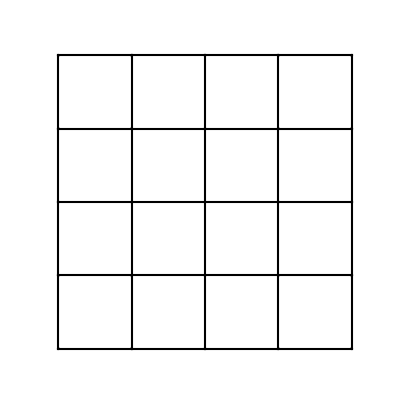

In [5]:
%matplotlib widget

fig, ax = plt.subplots()
fig.set_size_inches(size,size)
ax.set_ylim(-0.1, n+0.1)
ax.set_xlim(-0.1, n+0.1)
ax.set_aspect('equal')
ax.set_axis_off()


cr = 0.01
patches = []
black = [0,0,0,1]

for i in range(n):
    for j in range(n):
        ax.add_artist(Line2D([i,i+1], [j, j],color=black,picker=6, pickradius=3))
        ax.add_artist(Line2D([i,i], [j, j+1],color=black,picker=6, pickradius=3))

for i in range(n):
        ax.add_artist(Line2D([n,n], [i, i+1],color=black,picker=6, pickradius=3))
        ax.add_artist(Line2D([i,i+1], [n, n],color=black,picker=6, pickradius=3))

for i in range(n+1):
    for j in range(n+1):
        center = (i, j)
        circle = Circle(center, cr)
        circle.set_color([0,0,0,1])
        patches.append(circle)

p = PatchCollection(patches, match_original=True)
ax.add_collection(p)

clicklines = set()
def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    l = (xdata[0],ydata[0],xdata[1],ydata[1])
    if l not in clicklines:
        thisline.set_color((0,0,1))
        clicklines.add(l)
        print(l)
    else:
        thisline.set_color(black)
        clicklines.remove(l)
        print("removed ",l)
        

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()


In [6]:
clicklines

{(1, 1, 2, 1),
 (1, 3, 2, 3),
 (2, 1, 3, 1),
 (2, 2, 3, 2),
 (2, 3, 2, 4),
 (2, 3, 3, 3),
 (3, 1, 3, 2)}